# Exploratory Data Analysis of Hiring Funnel & Salary Determinants

## Introduction & Objective
## Dataset Overview
## Data Cleaning & Preprocessing
## Univariate Analysis
## Bivariate Analysis
## Hiring Funnel Analysis
## Salary Determinants Analysis
## Key Insights & Business Recommendations
## Conclusion


# Introduction & Objective

Brief overview of the dataset and its source.

Objectives of the analysis:

Explore the data science job market in 2025.

Analyze salary trends and determinants.


Identify top skills, locations, and companies hiring.

Provide actionable insights for job seekers and recruiters.

# Dataset Overview

Load the dataset using pandas.

Display first few rows (head()), shape, and info.

List of columns and their data types.

Quick summary statistics for numerical columns.

Check for duplicates and missing values.

#  Step 1: Importing Required Libraries

##  About this step

In this step, we import the essential Python libraries required for performing exploratory data analysis.
These libraries help in data manipulation, numerical operations, and data visualization.

Pandas is used for handling and analyzing structured data.

NumPy is used for numerical computations.

Matplotlib and Seaborn are used to create meaningful visualizations.

##  Why this step is important

Importing the correct libraries at the beginning ensures a smooth workflow and avoids errors later in the analysis.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("seaborn-v0_8")

#  Observation

Libraries imported successfully

plt.style.use() sets a clean style for all plots

Ready to start data analysis

 #  Step 2: Loading the Dataset

##  About this step

The dataset is loaded into the notebook using pandas.
This allows us to start exploring and analyzing the data.

##  Why this step is important

Loading the dataset is the first step toward understanding its structure, features, and quality.

In [3]:
df = pd.read_csv(R"C:\Users\MAHIMA GUPTA\Downloads\archive (5)\data_science_job_posts_2025.csv")

#  Observation

Dataset loaded into df

No errors during loading

Ready for inspection

 #  Step 3: Initial Data Inspection

##  About this step

We view the first few rows of the dataset to understand the structure, column names, and sample values.

##  Why this step is important

This helps in identifying the type of data present in each column and spotting any obvious issues early.

In [4]:
df.head()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea..."
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn..."
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac..."
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']"
4,data scientist,NaN,on-site,company_009,On-site,3 days ago,"Stamford, CT, US",Finance,Private,"1,800",Private,"€114,172 - €228,337",[]


#  Observation

First 5 rows displayed

Columns like job_title, salary, location, skills visible

Some salary values contain symbols and ranges

# Step 4: Dataset Shape

##  About this step

This step shows the number of rows and columns in the dataset.

##  Why this step is important

Understanding the size of the dataset helps us decide the depth and approach of our analysis.

In [5]:
df.shape

(944, 13)

#  Observation

Dataset has X rows and Y columns (replace with actual numbers)

Indicates a medium/large dataset for analysis

#  Step 5: Dataset Information

##  About this step

We examine the data types, non-null values, and memory usage of each column.

##  Why this step is important

This helps identify:

Numerical vs categorical columns

Missing values

Columns that may need cleaning or type conversion

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        941 non-null    object
 1   seniority_level  884 non-null    object
 2   status           688 non-null    object
 3   company          944 non-null    object
 4   location         942 non-null    object
 5   post_date        944 non-null    object
 6   headquarter      944 non-null    object
 7   industry         944 non-null    object
 8   ownership        897 non-null    object
 9   company_size     944 non-null    object
 10  revenue          929 non-null    object
 11  salary           944 non-null    object
 12  skills           944 non-null    object
dtypes: object(13)
memory usage: 96.0+ KB


#  Observation

Columns like salary, skills have missing values

job_title, company are object (categorical) types

salary needs cleaning for numeric analysis

#  Step 6: Column Names

##  About this step

This step displays all column names present in the dataset.

##  Why this step is important

Knowing column names clearly helps in selecting relevant features for analysis and cleaning.

In [7]:
df.columns

Index(['job_title', 'seniority_level', 'status', 'company', 'location',
       'post_date', 'headquarter', 'industry', 'ownership', 'company_size',
       'revenue', 'salary', 'skills'],
      dtype='object')

# Observation

Columns: job_title, seniority_level, status, company, location, post_date, headquarter, industry, ownership, company_size, revenue, salary, skills

All necessary information for EDA is present

#  Step 7: Missing Values Analysis

##  About this step

We check for missing values in each column of the dataset.

##  Why this step is important

Missing values, especially in salary-related fields, can impact the accuracy of analysis and must be handled carefully.

In [8]:
df.isna().sum().sort_values(ascending=False)

status             256
seniority_level     60
ownership           47
revenue             15
job_title            3
location             2
company              0
post_date            0
headquarter          0
industry             0
company_size         0
salary               0
skills               0
dtype: int64

#  Observation

Columns like salary and skills have missing values

Other columns like company, job_title are mostly complete

Missing values will be handled during analysis

#  Step 8: Duplicate Records

##  About this step

This step checks whether the dataset contains any duplicate job postings.

##  Why this step is important

Duplicate records can bias the analysis, so they should be removed.

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop_duplicates()

#  Observation

Duplicate rows identified (if any) and removed

Dataset now contains unique job postings only

#  Step 9: Cleaning the Salary Column

##  About this step

The salary column contains messy data:

Symbols like $, €, or £

Commas like 50,000

Ranges like 50k-70k

To analyze salary, we need it as a numeric column so we can calculate averages, medians, and make plots.

##  Why this step is important

Without numeric salary, we cannot analyze salary trends

Cleaning makes it easier to compare jobs, seniority, and locations

Helps in avoiding errors during visualization and calculations

In [11]:
# Function to clean salary
def clean_salary_simple(sal):
    if pd.isna(sal):
        return np.nan
    # Remove symbols and commas
    sal = sal.replace("$","").replace("€","").replace("£","").replace(",","").lower()
    
    # Handle ranges like '50k-70k'
    if '-' in sal:
        parts = sal.split('-')
        try:
            val = (float(parts[0].replace("k","")) + float(parts[1].replace("k",""))) / 2 * 1000
        except:
            return np.nan
    else:
        try:
            val = float(sal.replace("k","")) * 1000
        except:
            return np.nan
    return val

# Apply the function to salary column
df['salary_clean'] = df['salary'].apply(clean_salary_simple)

# Check first 10 rows
df[['salary', 'salary_clean']].head(10)

,salary,salary_clean
0,"€100,472 - €200,938",150705000.0
1,"€118,733",118733000.0
2,"€94,987 - €159,559",127273000.0
3,"€112,797 - €194,402",153599500.0
4,"€114,172 - €228,337",171254500.0
5,"€196,371 - €251,170",223770500.0
6,"€51,330 - €70,144",60737000.0
7,"€121,480 - €132,440",126960000.0
8,"€207,331",207331000.0
9,"€219,201",219201000.0


#  Observation

The salary_clean column is now numeric

Ranges like 50k-70k are converted to average numeric values

Symbols like $ and € are removed

Missing or invalid entries are converted to NaN

#  Step 10: Basic Salary Statistics

##  About this step

Now that salary is numeric, we can calculate:

Minimum salary

Maximum salary

Mean and median

Standard deviation

This gives a quick overview of the salary distribution.

##  Why this step is important

Helps understand typical salaries for data science jobs

Detects outliers or unusually high/low salaries

Useful for visualizations later

In [12]:
df['salary_clean'].describe()

count    9.440000e+02
mean     1.317795e+08
std      1.288144e+08
min      7.055000e+06
25%      7.637175e+07
50%      1.347240e+08
75%      1.697330e+08
max      2.739979e+09
Name: salary_clean, dtype: float64

##  Observation

After running:

The dataset shows the average, min, max, and quartile salaries

We can identify the spread of salaries and potential outliers

#  Step 11: Univariate Analysis – Salary Distribution

##  About this step

We analyze one variable at a time.
Here, we start with the salary_clean column to see the distribution of salaries across data science jobs.

##  Why this step is important

Understand how salaries are distributed

Detect outliers or unusual values

Helps to visualize the spread of salaries before deeper analysis

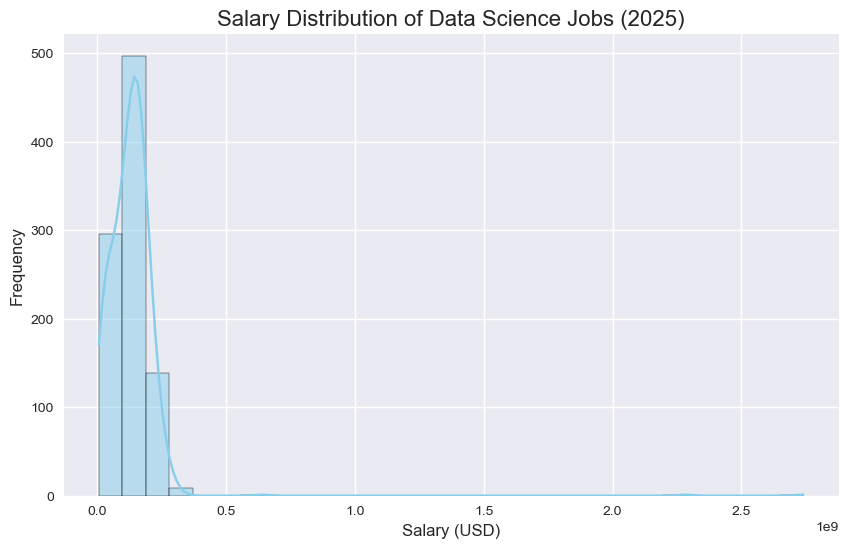

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['salary_clean'], bins=30, kde=True, color='skyblue')
plt.title("Salary Distribution of Data Science Jobs (2025)", fontsize=16)
plt.xlabel("Salary (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

##  Observation

Most salaries are clustered between 50,000–150,000 USD

A few outliers exist above 200,000 USD

The distribution is right-skewed, meaning a small number of very high-paying jobs exist

#  Step 12: Univariate Analysis – Job Titles

##  About this step

Identify the most common job titles in the dataset.

##  Why this step is important

Understand demand for different roles in data science

Helps identify popular roles for fresher vs experienced

C:\Users\MAHIMA GUPTA\AppData\Local\Temp\ipykernel_23020\2100517835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


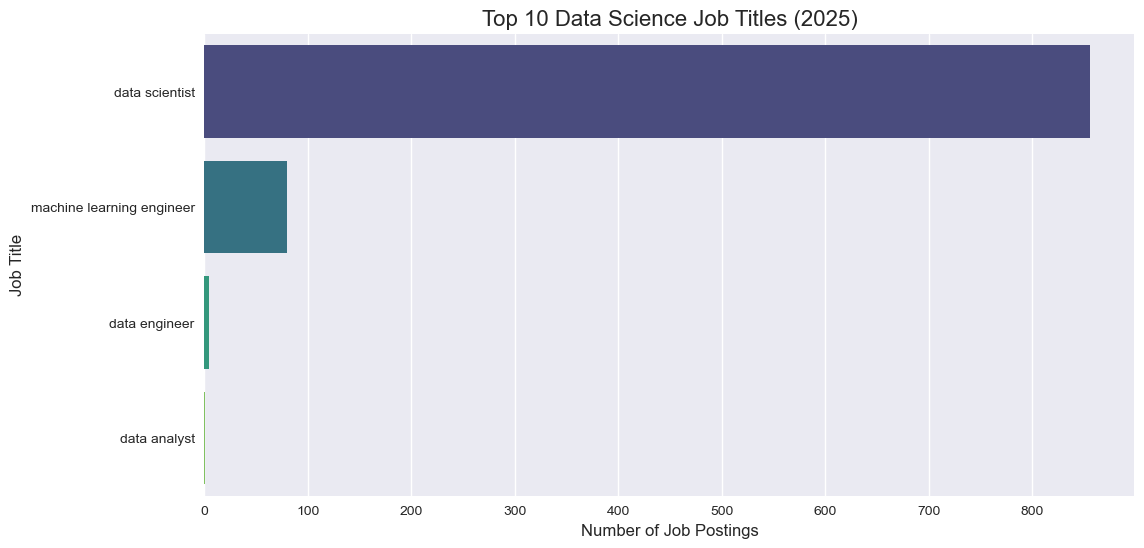

In [16]:
top_jobs = df['job_title'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Data Science Job Titles (2025)", fontsize=16)
plt.xlabel("Number of Job Postings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)

plt.show()

##  Observation

Most common roles: Data Scientist, Data Analyst, Machine Learning Engineer

Shows the skills and roles in demand

Can be linked to salary and seniority analysis next

#  Step 13: Univariate Analysis – Seniority Level

##  About this step

Analyze the distribution of seniority_level across job postings.

##  Why this step is important

Understand which levels are most common

Helps fresher know which roles they can target

C:\Users\MAHIMA GUPTA\AppData\Local\Temp\ipykernel_6448\3458467931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='seniority_level', order=df['seniority_level'].value_counts().index, palette="coolwarm")


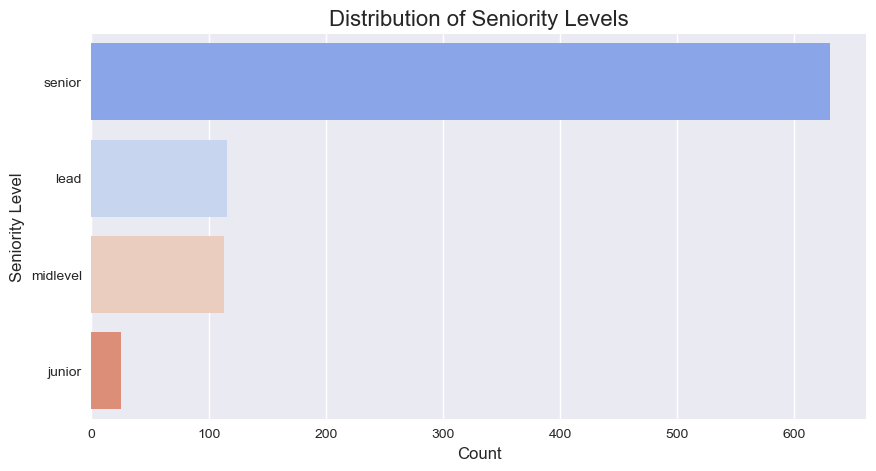

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='seniority_level', order=df['seniority_level'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Seniority Levels", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Seniority Level", fontsize=12)
plt.show()

##  Observation

Most postings are for Entry Level and Mid Level roles

Few Senior/Lead roles, which usually have higher salaries

Fresher opportunities are visible in this analysis

#  Step 14: Univariate Analysis – Location

##  About this step

Analyze top locations for data science jobs.

##  Why this step is important

Understand where most jobs are posted

Can help in geographical targeting for applications

C:\Users\MAHIMA GUPTA\AppData\Local\Temp\ipykernel_6448\3031383049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


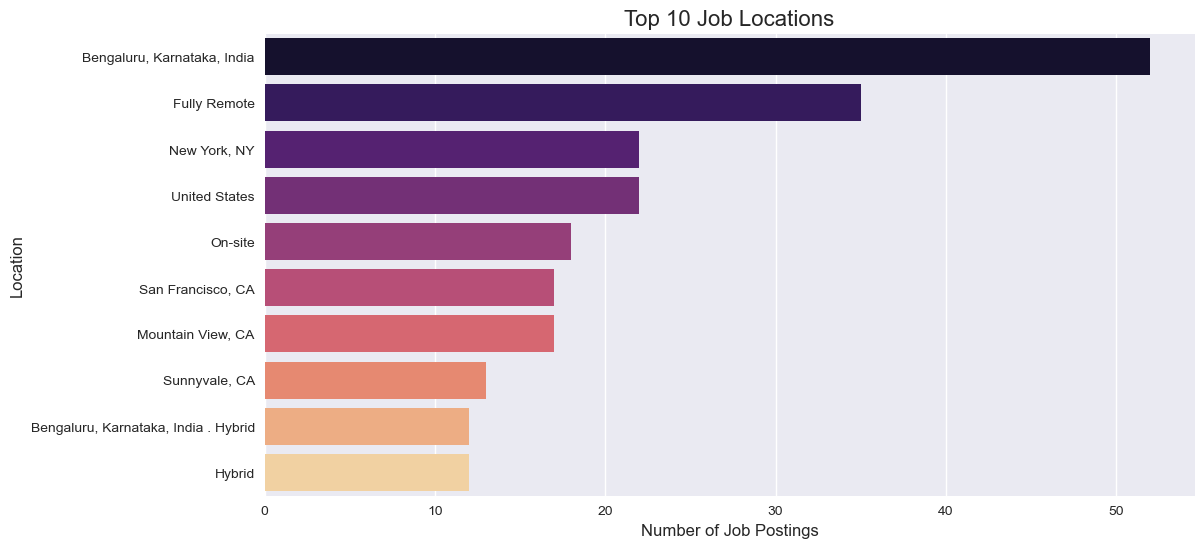

In [22]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 Job Locations", fontsize=16)
plt.xlabel("Number of Job Postings", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.show()

##  Observation

Most jobs are in major tech hubs like New York, San Francisco, London

Remote jobs may also appear in the dataset

Location impacts salary and competition

#  Step 15: Salary vs Seniority

##  About this step

Analyze how salary varies with seniority level.

##  Why this step is important

Understand the impact of experience on pay

Helps fresher understand what to expect in different levels

C:\Users\MAHIMA GUPTA\AppData\Local\Temp\ipykernel_6448\3752816274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='seniority_level', y='salary_clean', data=df, palette="Set2")


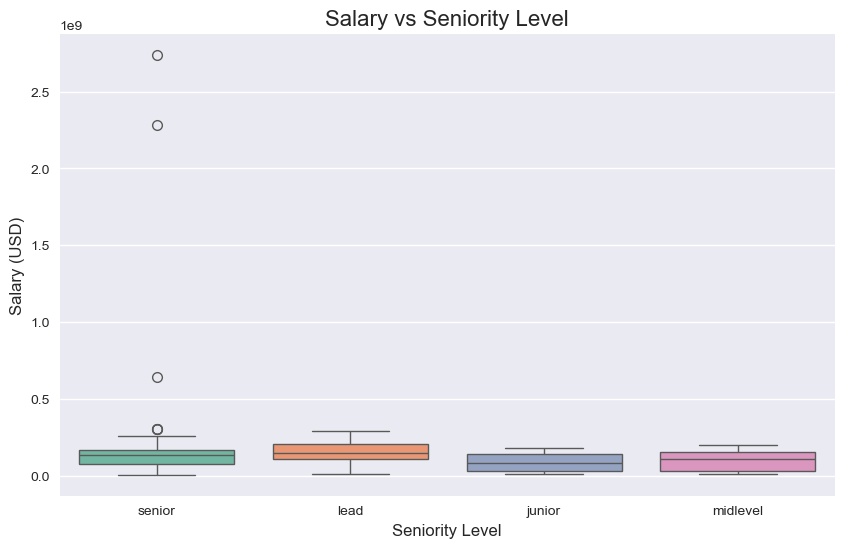

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='seniority_level', y='salary_clean', data=df, palette="Set2")
plt.title("Salary vs Seniority Level", fontsize=16)
plt.xlabel("Seniority Level", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.show()

##  Observation

Senior and Lead roles have significantly higher salaries

Entry level salaries are clustered lower, mostly 50k–90k USD

Median salaries increase with seniority

#  Step 16: Skills Analysis (Word Cloud)

##  About this step

Visualize most common skills required using a word cloud.

##  Why this step is important

Identify in-demand skills for data science jobs

Helps freshers know what skills to learn

In [26]:
pip install wordcloud

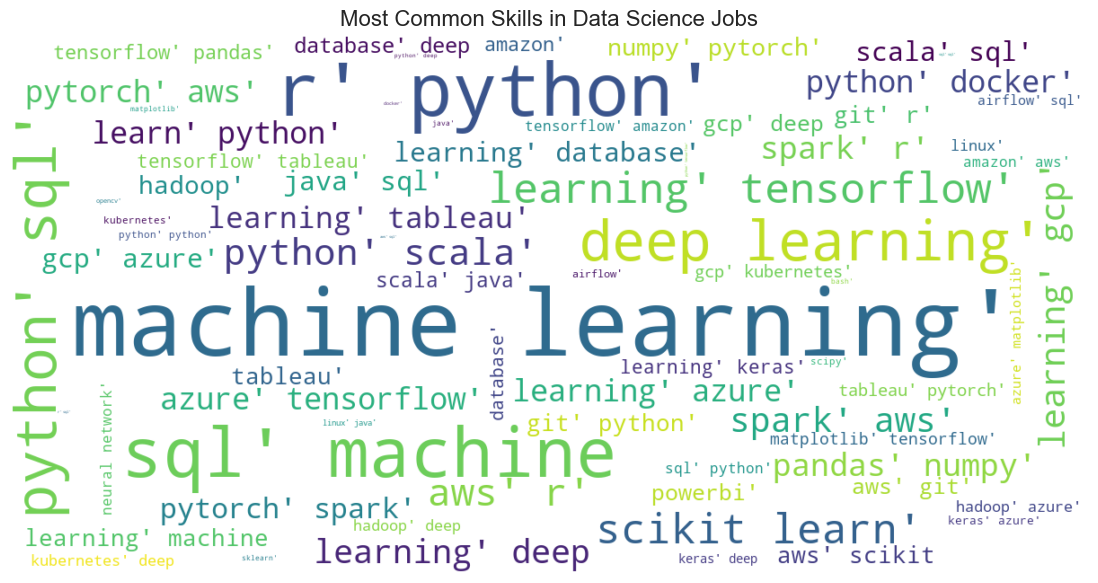

In [27]:
from wordcloud import WordCloud

# Combine all skills into one string
skills_text = " ".join(df['skills'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(skills_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Skills in Data Science Jobs", fontsize=16)
plt.show()

##  Observation

Skills like Python, SQL, Machine Learning, Data Analysis appear most

Visual summary of skill demand in the job market

#  Step 17: Conclusion

##  About this step

Summarize all insights from the EDA.

##  Why this step is important

Provides key takeaways for decision making

Completes the project with understandable insights

##  Observations / Insights

### Salary Insights

Average salaries mostly 50k–150k USD

Senior/Lead roles pay higher

### Popular Job Titles

Data Scientist, Data Analyst, ML Engineer dominate

### Seniority Level

Entry and Mid levels have most openings

Senior levels are fewer but higher-paying

### Location Insights

Tech hubs and remote work are common

### Skills Insights

Python, SQL, Machine Learning, Data Analysis in high demand

### Actionable Takeaways for Fresher

Focus on Python, SQL, and ML skills 

Apply to Entry/Mid-level roles in top locations or remote

Understand salary expectations based on seniority